# Melbourne housing price prediction

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('dark')
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df=pd.read_csv('melb_data.csv')
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


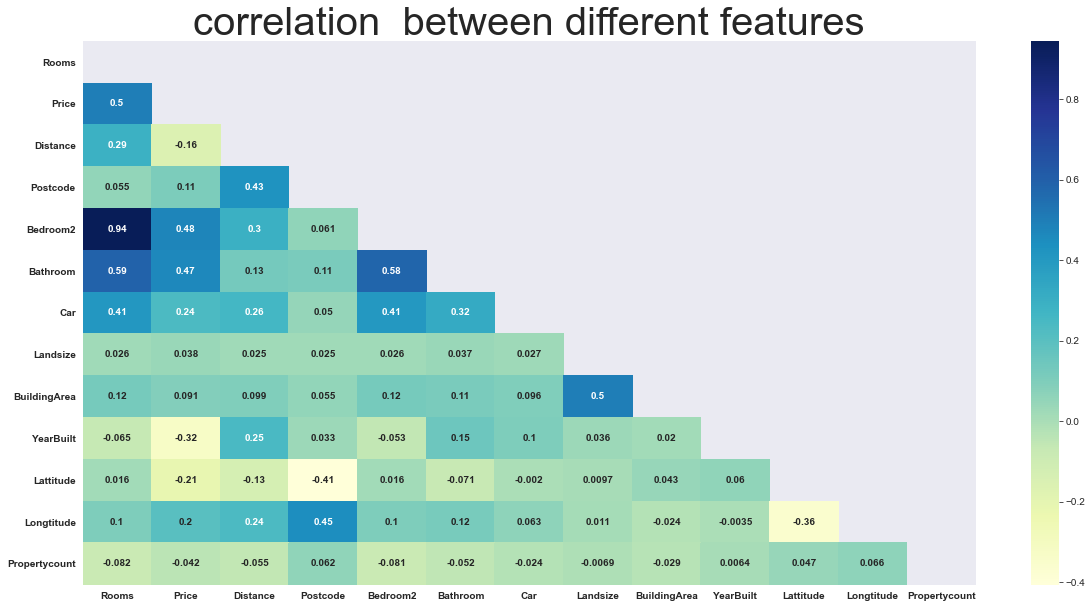

In [29]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,mask=np.triu(np.ones_like(df.corr())),cmap="YlGnBu",annot_kws={'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('correlation  between different features',fontsize=40);

from above figure ,we can conclude that
-  bedrooms and room have high correlation
-  barthroom and bedroom have correlation
-  price and room
-  negative correlation between distance and price
-  building area and land have positive correlation

In [12]:
df.corr()['Price'] # lets see correlation of dependent feature(price) with orther independent feature

Rooms            0.496634
Price            1.000000
Distance        -0.162522
Postcode         0.107867
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Landsize         0.037507
BuildingArea     0.090981
YearBuilt       -0.323617
Lattitude       -0.212934
Longtitude       0.203656
Propertycount   -0.042153
Name: Price, dtype: float64

In [17]:
# I will make custom function to create scatter plot to see correlation between features

def scatter_plot(df,col1,col2):
   
    plt.figure(figsize=(10,7))
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col1],df[col2])

    sns.regplot(df[col1],df[col2],color='red',ci=None,
               line_kws={'label':f'y={round(slope,6)}x + {round(intercept,2)}','color':'green'})
    plt.xlabel(col1,fontweight='bold')
    plt.ylabel(col2,fontweight='bold')
    plt.title(f' scatter plot between {col1} and {col2}',fontweight='bold')
    plt.legend()

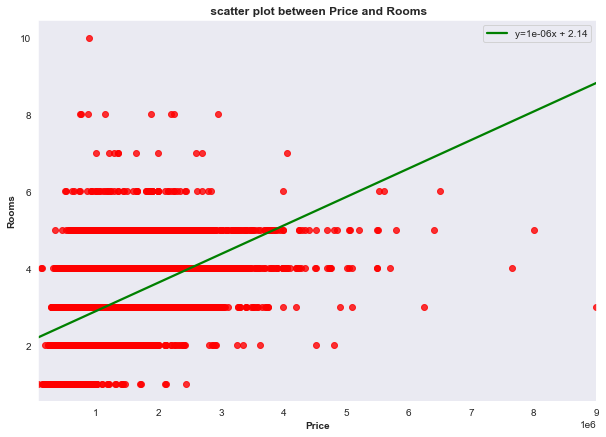

In [18]:
scatter_plot(df,'Price','Rooms')

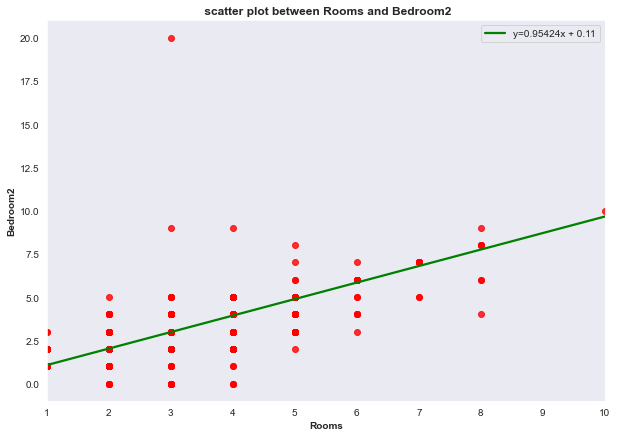

In [20]:
scatter_plot(df,'Rooms','Bedroom2')

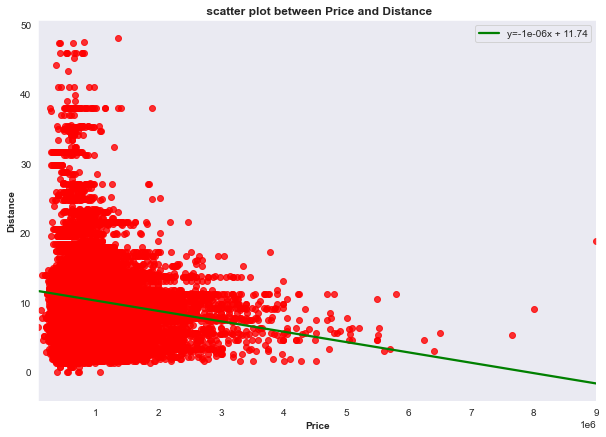

In [22]:
scatter_plot(df,'Price','Distance')

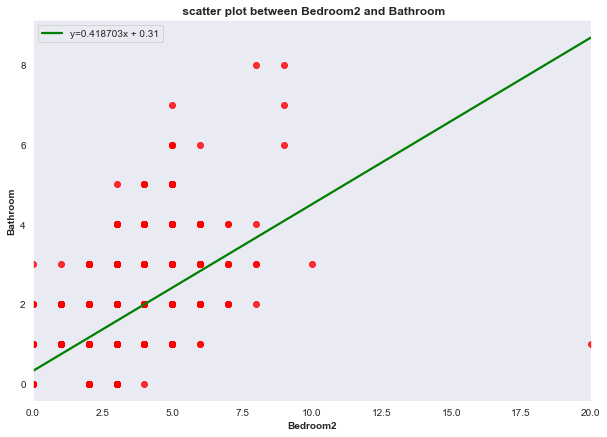

In [24]:
scatter_plot(df,'Bedroom2','Bathroom')

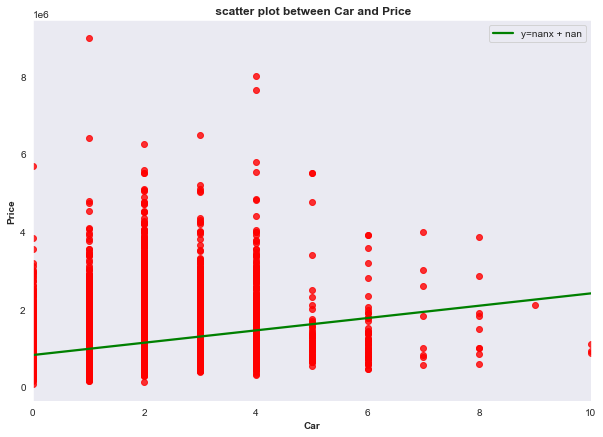

In [25]:
scatter_plot(df,'Car','Price')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
def plot(feature):
    plt.figure(figsize=(10,7))
    plt.scatter(X[feature],y,color='red',marker='o',edgecolors='black')
    plt.ylabel('Price(log scale)')
    plt.xlabel(feature)
    plt.title(f'scatter plot between price and {feature}',fontweight='bold')
    plt.yscale("log")
menu=X.columns
interact(plot,feature=menu)

interactive(children=(Dropdown(description='feature', options=('Suburb', 'Address', 'Rooms', 'Type', 'Method',…

<function __main__.plot(feature)>

In [2]:
ncol=list(df.select_dtypes(['int64','float64']).columns)
ncol

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

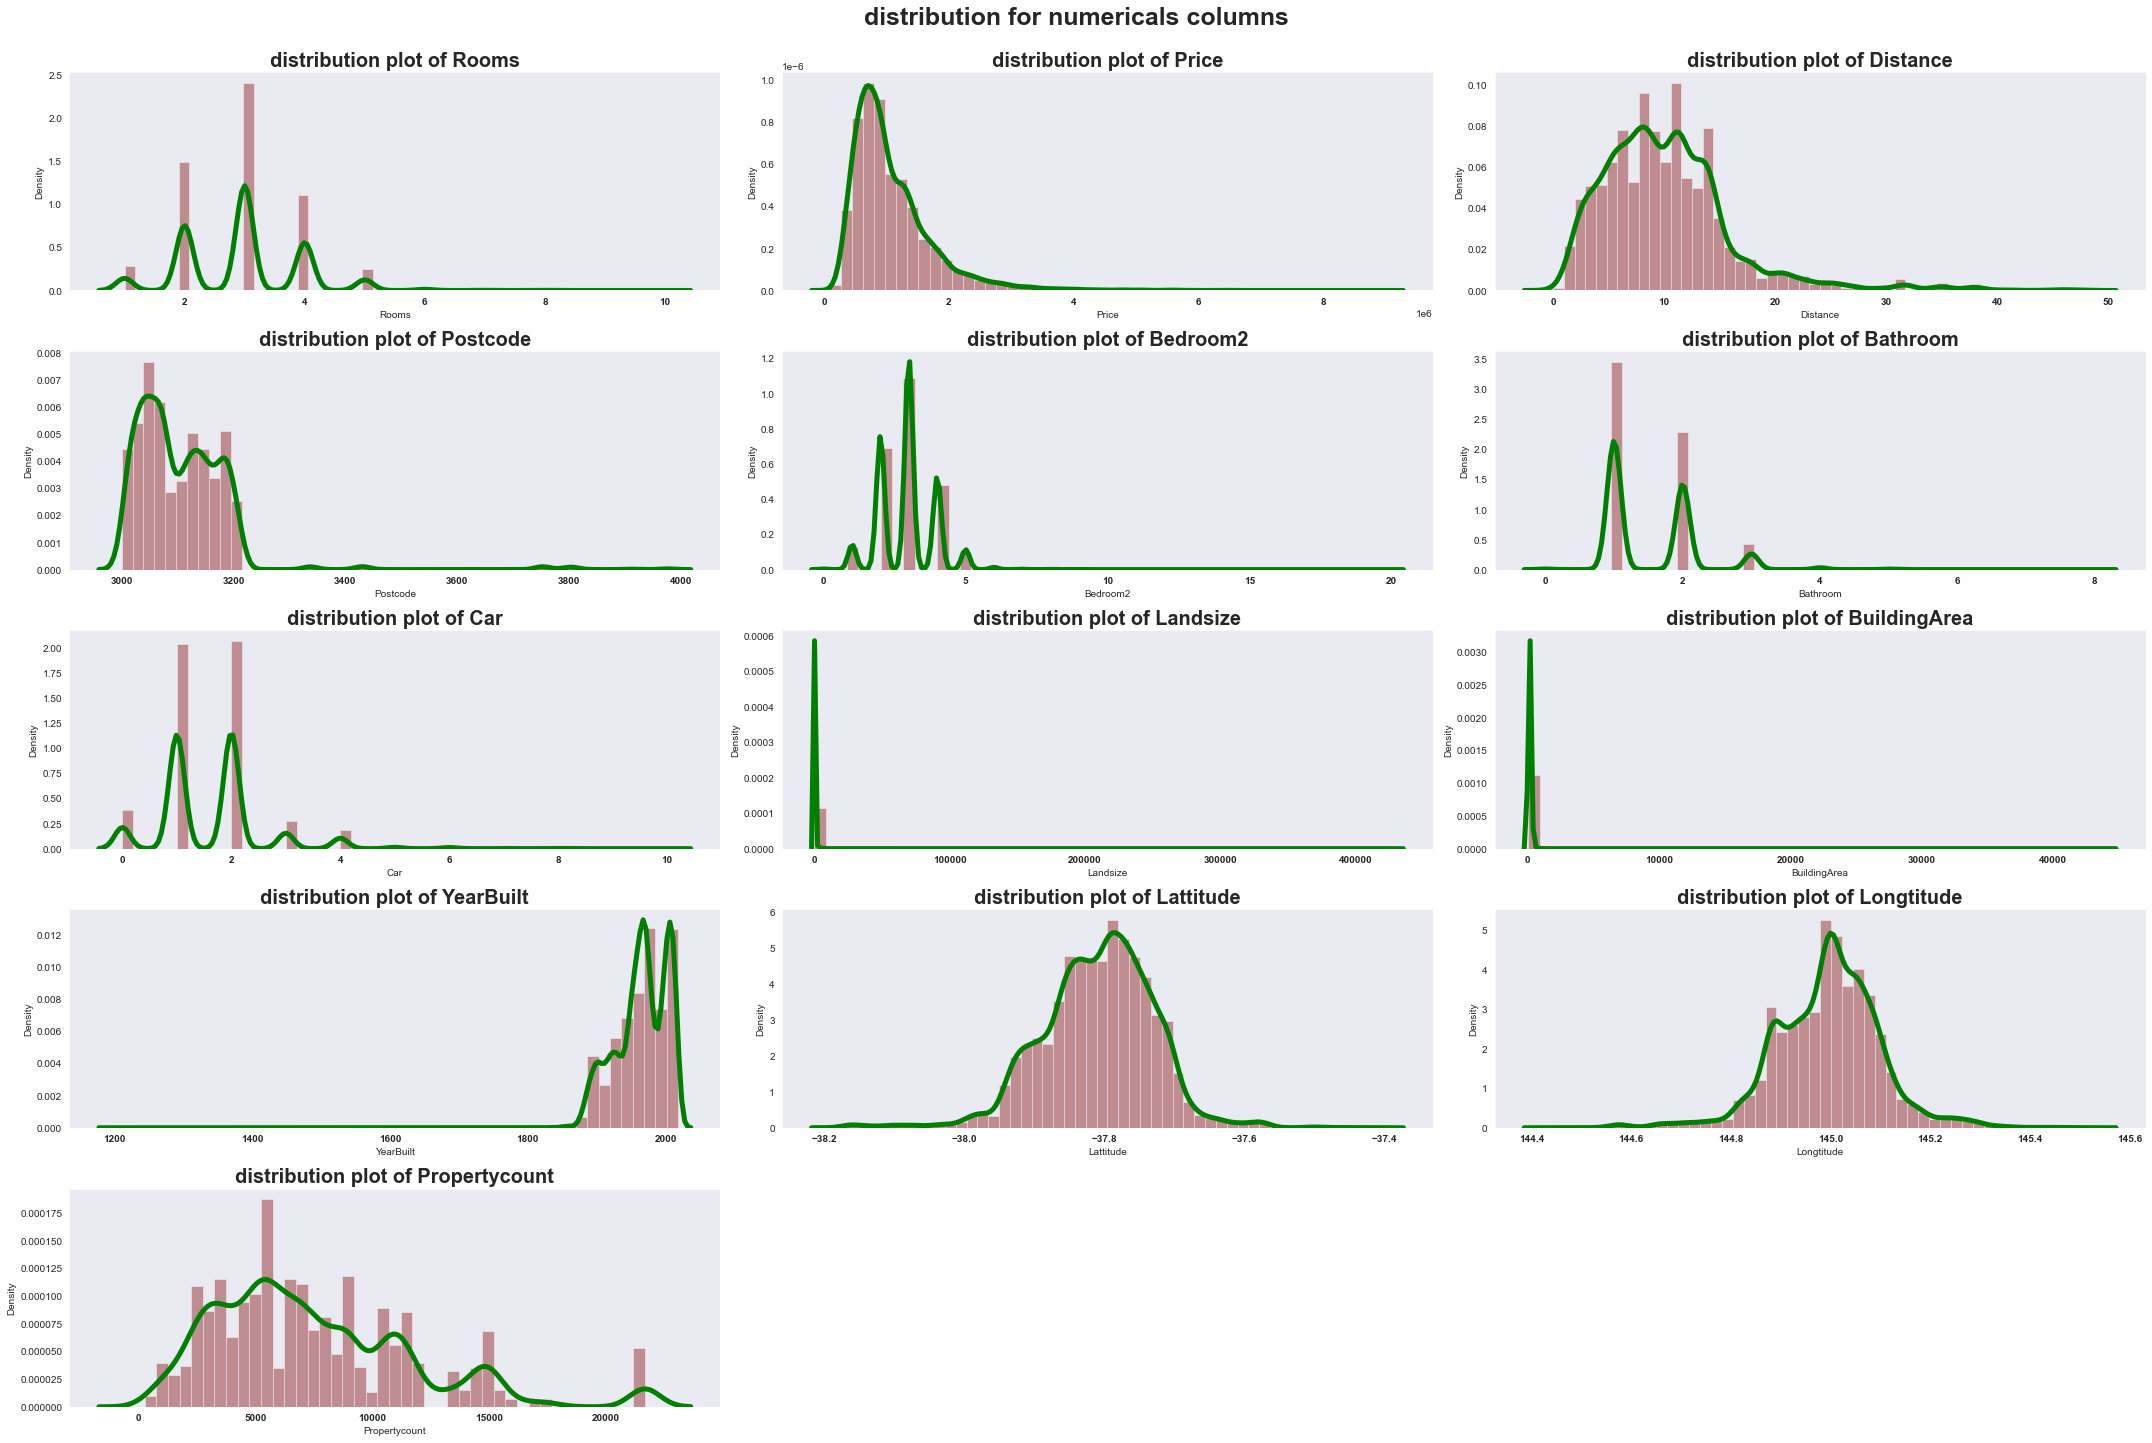

In [36]:
# lets see the distribution for the continous data
plt.figure(figsize=(30,20))
for i,col in enumerate(ncol):
  plt.suptitle('distribution for numericals columns',fontweight='bold',fontsize=25,y=1)
  plt.subplot(5,3,i+1)
  sns.distplot(df[col],color='maroon',kde_kws={'linewidth':5,'color':'green'})
  plt.title(f'distribution plot of {col}',fontweight='bold',fontsize=20)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  plt.tight_layout()

as we can see most of the distribution is  right skewed, hence outlier exist in right hand side we can check this by using boxplot 

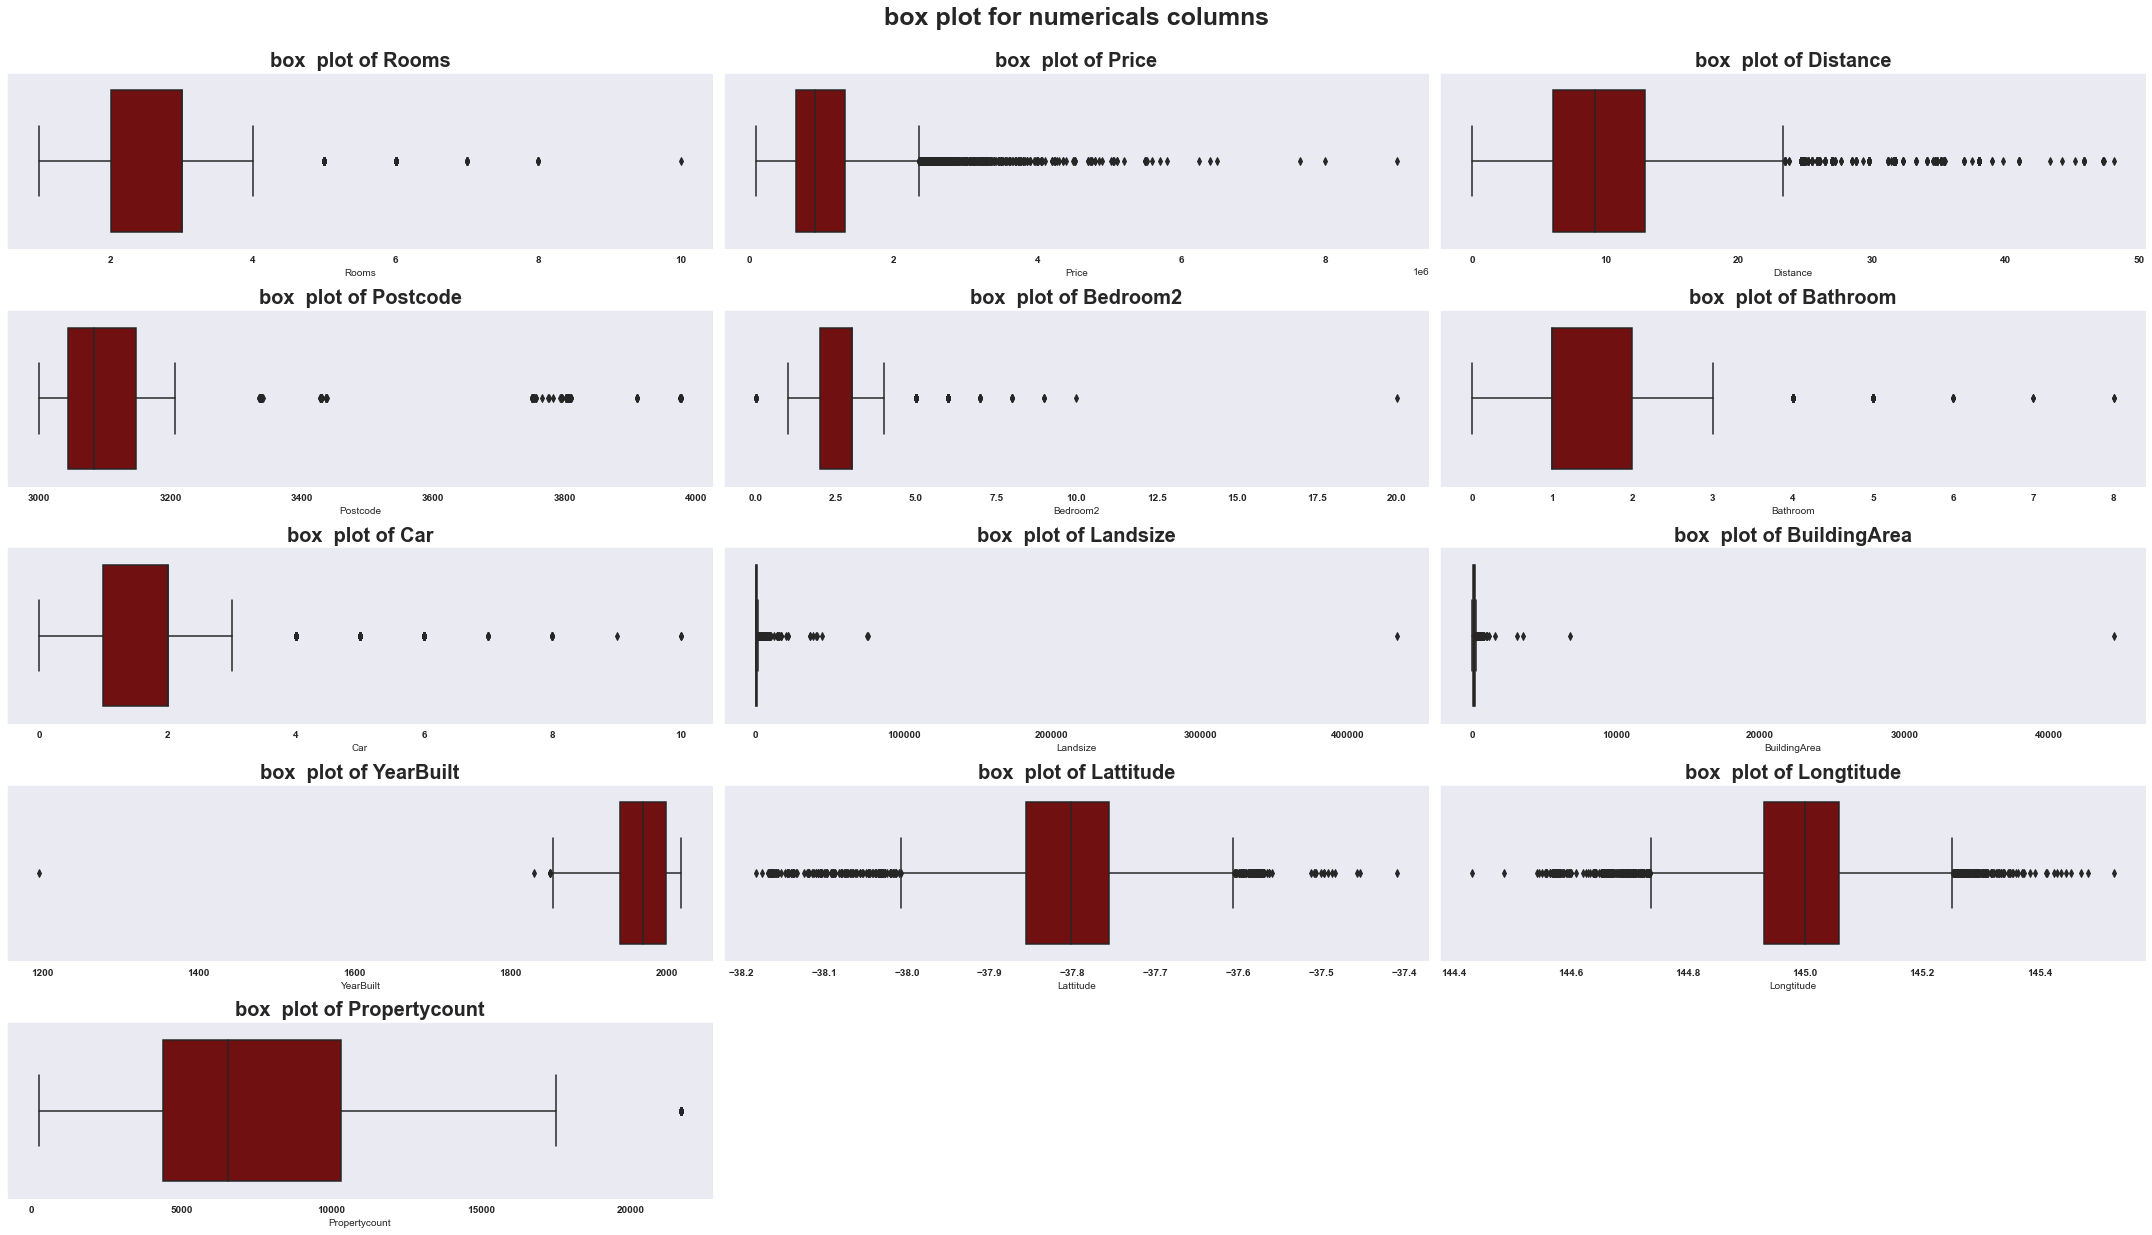

In [39]:
#lets used box plot to see ouliers in each columns

plt.figure(figsize=(30,20))
for i,col in enumerate(ncol):
  plt.suptitle('box plot for numericals columns',fontweight='bold',fontsize=25,y=1)
  plt.subplot(6,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.boxplot(df[col],color='maroon')
  plt.title(f'box  plot of {col}',fontweight='bold',fontsize=20)
  plt.tight_layout()

As we can see outliers exsit in the right hand side as distribution in right skwed

# Outlier Treatment

In [4]:
# here we make custom function to that any value greater than upper bound by upper bound
#similarly any value less than lower bound is replaced by lower bound
def outlier(df,col):
    #fig,(ax1,ax2)=plt.subplots(2,1)
    #sns.boxplot(df[col],ax=ax1,color='maroon')
    #ax1.set_title(f' {col} column before removing outliers')
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    ub=1.5*IQR+q3
    lb=q1-1.5*IQR
    df[col]=np.where(df[col]>ub,ub,np.where(df[col]<lb,lb,df[col]))
    #sns.boxplot(df[col],ax=ax2)
    #ax2.set_title(f'{col} column after removing outliers')
    #plt.tight_layout()

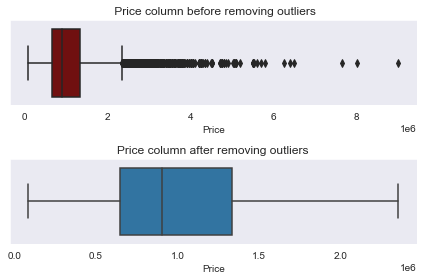

In [136]:
outlier(df,'Price')

In [7]:
import numpy as np   # applying function
for item in ncol:
    outlier(df,item)

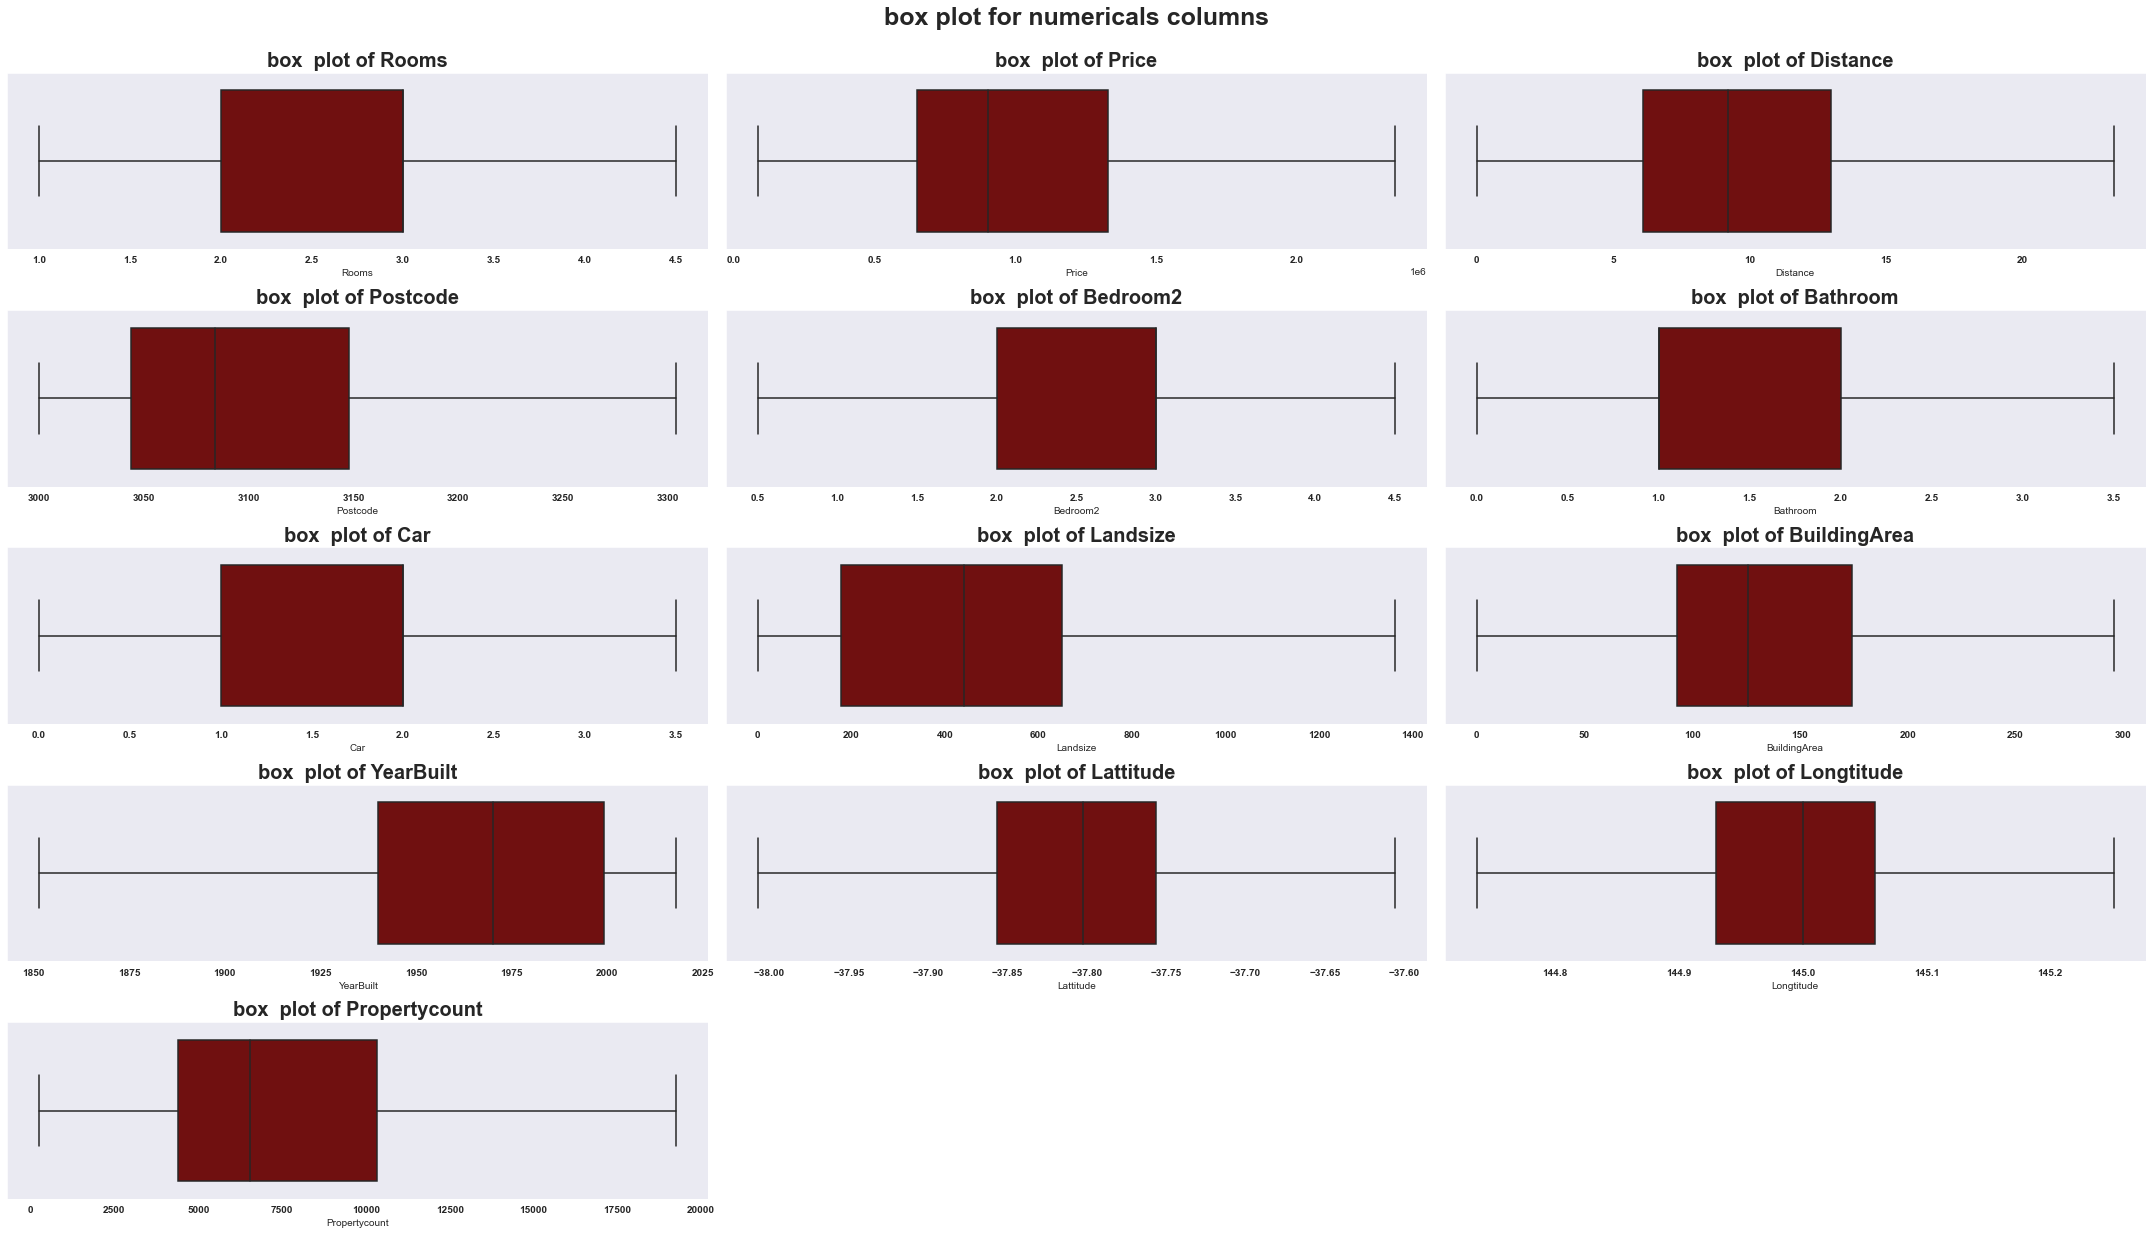

In [140]:
#lets again see the box plot after  removing the outliers

plt.figure(figsize=(30,20))
for i,col in enumerate(ncol):
  plt.suptitle('box plot for numericals columns',fontweight='bold',fontsize=25,y=1)
  plt.subplot(6,3,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.boxplot(df[col],color='maroon')
  plt.title(f'box  plot of {col}',fontweight='bold',fontsize=20)
  plt.tight_layout()

In [8]:
y = df.Price  #target or dependent variable
X = df.drop(['Price'], axis=1)  #independent variable

In [9]:
# categorical having caridinal number less than 15
cat_col=[col for col in X.columns if X[col].nunique()<15 and X[col].dtype=='O']
cat_col

['Type', 'Method', 'Regionname']

In [10]:
#numerical columns
num_col=[col for col in X.columns if X[col].dtype in ['int64','float64']]
num_col

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [11]:
# merging  above both  columns
my_col=num_col+cat_col
X=X[my_col]

# Feature selection

In [14]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [15]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)


In [16]:
my_list=list(mi_scores[:14].index)
my_list

['Postcode',
 'Propertycount',
 'Rooms',
 'Distance',
 'Bedroom2',
 'Type',
 'Longtitude',
 'Landsize',
 'Lattitude',
 'Bathroom',
 'Method',
 'Regionname',
 'BuildingArea',
 'Car']

In [17]:
X=df[my_list]

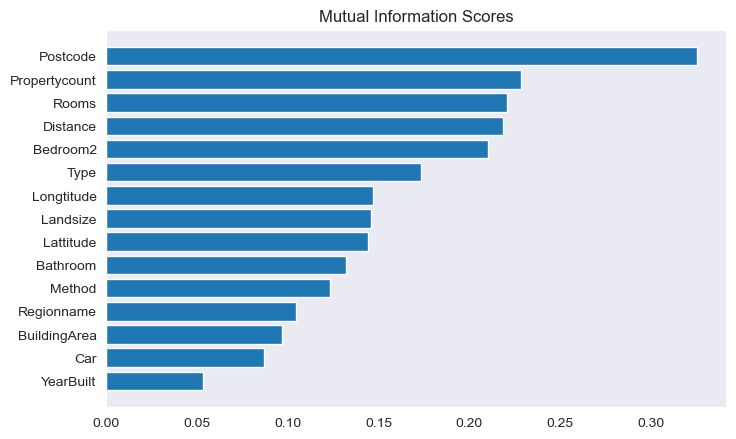

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


# Model Building

In [19]:
from sklearn.model_selection import KFold


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score



In [20]:
#now i am using stratified cross validation
kfold=KFold(n_splits=5,shuffle=True,random_state=0)

- cross  validation is a statistical method of evaluating generlisation performance  that is more stable 
- In stratified cross validation, we split the dta  data such that proportion between classes are same in each fold.

we can see the difference between these two cross validation in the figure  below

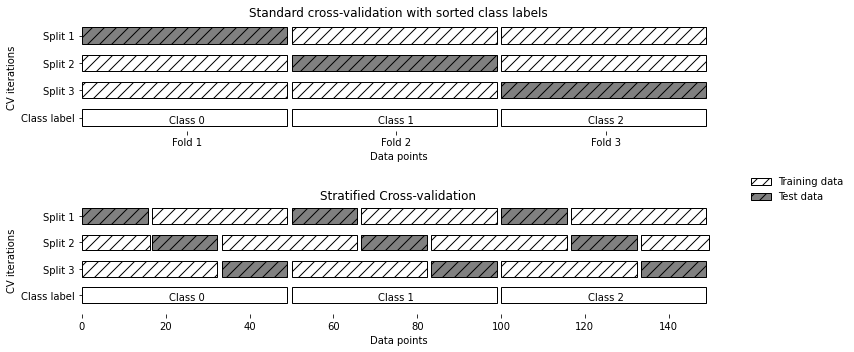

In [62]:
X.dtypes

Postcode         float64
Rooms              int64
Bedroom2         float64
Distance         float64
Propertycount    float64
Type              object
dtype: object

In [21]:
num_col=[col for col in X.columns if X[col].dtype in ['int64','float64']]
num_col

['Postcode',
 'Propertycount',
 'Rooms',
 'Distance',
 'Bedroom2',
 'Longtitude',
 'Landsize',
 'Lattitude',
 'Bathroom',
 'BuildingArea',
 'Car']

In [22]:
# categorical having caridinal number less than 10
cat_col=[col for col in X.columns if X[col].nunique()<15 and X[col].dtype=='O']
cat_col

['Type', 'Method', 'Regionname']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('imputer',IterativeImputer()),
    ('scalar',StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [24]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ])

# Randomforest Regressor

In [25]:

model = RandomForestRegressor() # this is my model with all default parameter
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # ceating my pipeline  and passing  two steps
                                  ('model', model)
                                 ])
scores = cross_val_score(my_pipeline, X, y,   # cv=kfold denote stratified cross validation
                                  cv=kfold,
                                  scoring='r2')
   



In [26]:
import numpy as np
print("r 2 scores:\n", np.mean(scores))

r 2 scores:
 0.8519549765520404


# Hypertunning the  model

In [ ]:
RandomForestRegressor()

In [32]:
X.shape

(13580, 14)

In [85]:
[int(x) for x in np.linspace(100,1000,10)]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [90]:
params={
    'model__n_estimators':[int(x) for x in np.linspace(100,2000,20)],
    'model__max_depth':range(1,20),
    'model__min_samples_split':[2,4,8,16,32,64,128]
    
} 

        
        
        

In [91]:
model = RandomForestRegressor(random_state=0)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=params,n_iter=5,scoring='r2',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [92]:
random_search.fit(X,y) # fitting my model with  random search object

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                                                                               ('scalar',
                                                                                                StandardScaler())]),
                                                                               ['Postcode',
                                                                                'Propertycount',
                                                                                'Rooms',
                                                                                'Distance',
                                                                                'Bedroom2',
                                                                                'Longtitude',
                                                                                'Landsize',
                                                                                'Lattitude',
                                                                                'Bathroom',
                                                                                'BuildingArea',
                                                                                'Car...
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['Type',
                                                                                'Method',
                                                                                'Regionname'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__max_depth': range(1, 20),
                                        'model__min_samples_split': [2, 4, 8,
                                                                     16, 32, 64,
                                                                     128],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000, 1100,
                                                                1200, 1300,
                                                                1400, 1500,
                                                                1600, 1700,
                                                                1800, 1900,
                                                                2000]},
                   scoring='r2', verbose=1)

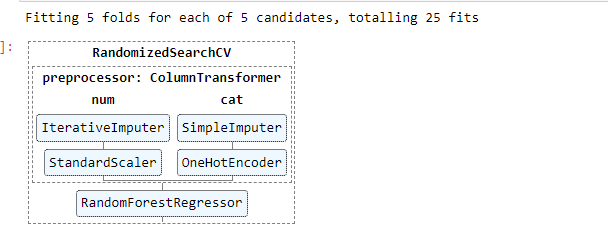

In [95]:
param=random_search.best_params_ 
param#best parameter

{'model__n_estimators': 900,
 'model__min_samples_split': 16,
 'model__max_depth': 14}

In [96]:
random_search.best_score_

0.8469597797787121

# xgboost

In [97]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', my_model)
                                 ])
scores = cross_val_score(my_pipeline, X, y,
                                  cv=kfold,
                                  scoring='r2')
   

In [98]:
import numpy as np
print("r 2 scores:\n", np.mean(scores))

r 2 scores:
 0.8568842170220338


Now i will hypertune above model

In [20]:
XGBRegressor()

In [100]:
np.linspace(0.01,0.1,10)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

# Hyper tunning the model

In [104]:
#randmise cv
params={
    'model__n_estimators':[int(x) for x in np.linspace(100,2000,20)],
    'model__max_depth':range(1,20),
    'model__min_samples_split':[2,4,8,16,32,64,128],
    'model__learning_rate':np.linspace(0.01,0.1,10),
    'model__subsample':np.linspace(0.01,0.1,10)
    
    
} 

        

In [105]:
model = XGBRegressor()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=params,n_iter=5,scoring='r2',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [ ]:
random_search.fit(X,y)

In [107]:
random_search.best_params_   # best parameter

{'model__subsample': 0.1,
 'model__n_estimators': 1000,
 'model__min_samples_split': 4,
 'model__max_depth': 8,
 'model__learning_rate': 0.01}

In [108]:
random_search.best_score_  # best score

0.866585142186359